Как пользоваться моделью квадрокоптера и вычисления управления:

In [1]:
from quadrocopter_dynamics_simulation import *
from quadrocopter_lyapunov_control import *

Сначала нужно инициировать количество итераций и шаг по времени.

In [2]:
N = 3000
h = 0.01

Далее задать возмущающие моменты, например, нулями:

In [3]:
Mext = np.zeros((3,N))

После задать начальные условия задачи Коши, то есть стартовые координаты, импульсы, угловые скорости, и начальные кватернионы рекомендую $q_0 = 1, q_1 = 0, q_2 = 0, q_3 = 0$, так же указать начальный суммарный момент лопастей u_init

In [4]:
w_init = np.array([0,0,0])
q_init = np.array([1,0,0,0])
p_init = np.array([0,0,0])
r_init = np.array([0,0,0])
u_init = np.array([0,0,0,0])

Определить желаемые импульсы как функцию от времени. 

In [5]:
p_like_cont = np.zeros((3,N))
t = np.linspace(0, h*N,N)
p_like_cont[2,:500] =  1

Создать объект управления

In [6]:
QQ1 = quadrocopter_control() 

Задать в него возмущения 

In [7]:
QQ1.perturbation(Mext)

Ввести все переходные параметры в метод control_calc, от в свою очередь вычислит закон управления

In [9]:
QQ1.control_calc(h, N, w_init, q_init, p_init, u_init, 0.2, 0.3, 7, p_like_cont)

Создать объект квадрокоптер, и передать ему возмущения и управления через соответствующие методы perturbation и control

In [10]:
QQ2 = quadrocopter()        
QQ2.perturbation(Mext)
QQ2.control(QQ1.ww_h)

ww_h - это массив содержащий скорости винтов как функции от времени, первый индекс массива соответствует номеру винта

Далее вызвать метод симуляции передав ей все необходимые значения для решения задачи Коши

In [11]:
QQ2.motion_simulation(h, N, w_init, q_init, p_init, r_init)

Для отображения есть метод вызова графиков динамических переменных от времени

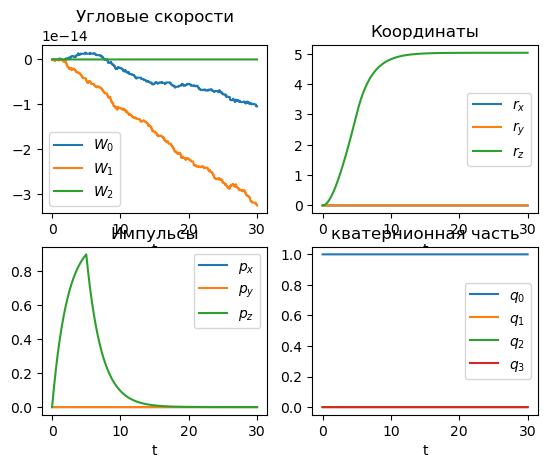

In [12]:
QQ2.motion_pattern_graph()

или вызов удобной анимации углового и центрального движения

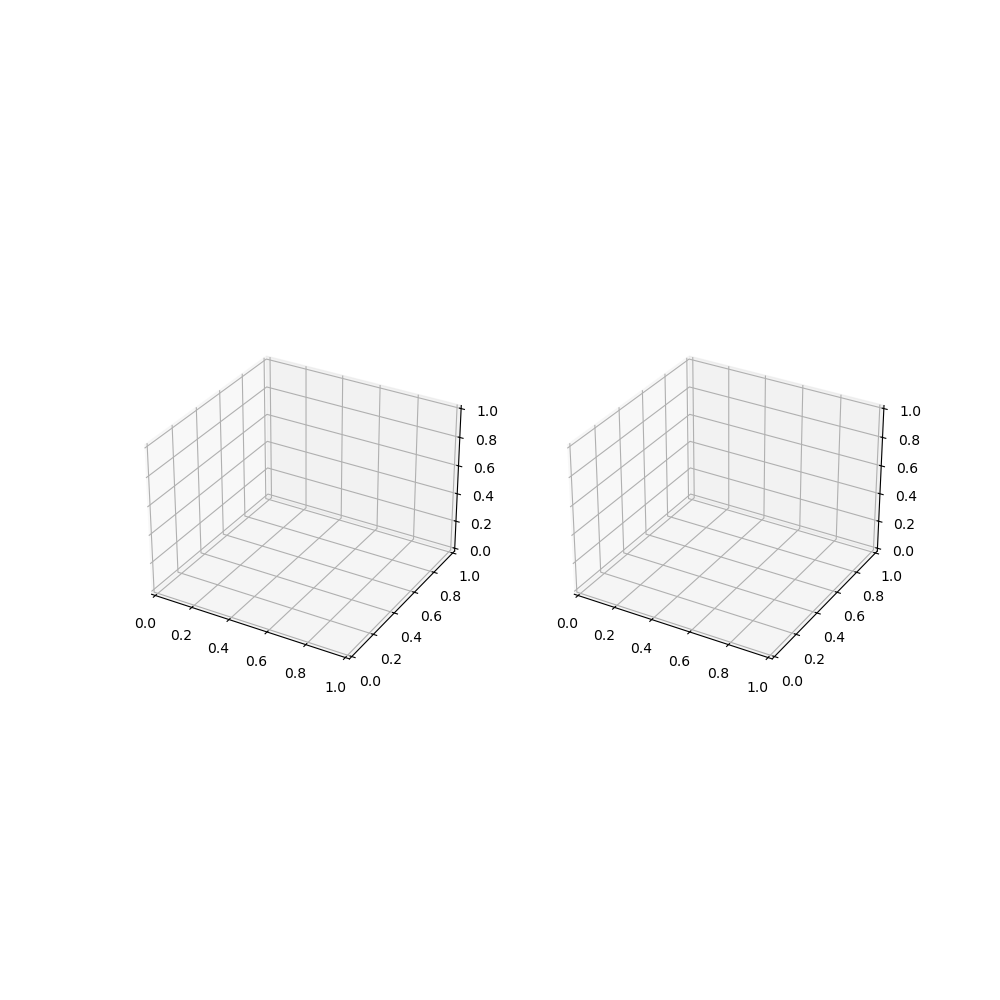

In [13]:
%matplotlib widget
QQ2.simulation_animate()